<a href="https://colab.research.google.com/github/leticiaqs/puc-machine-learning/blob/main/MVP_machine_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP_PARTE A - MACHINE LEARNING



## Descrição do Problema



O Rio de Janeiro é uma cidade que atrai muitas pessoas, especialmente pelo seu potencial turístico. Muitos daqueles que têm a Cidade Maravilhosa como destino acabam procurando o Airbnb para a escolha de sua hospedagem. Nesse sentido, o aluguel de apartamentos na plataforma também se tornou um negócio que pode ser bastante vantajoso para aqueles que possuem um bom imóvel e sabem tirar o melhor proveito dela.

O problema proposto nesta parte do MVP consiste então em conseguir prever o preço da diária no Airbnb, considerando uma acomodação no Rio. Para essa predição, tem-se como base algumas das principais características da acomodação - tanto relacionadas a aspectos físicos do local, como aspectos referentes à prória plataforma, a exemplo de avaliações, rapidez para a reserva, etc.

Uma vez que o resultado esperado se relaciona ao valor da diária, sendo uma variável numérica continua, trata-se então de um problema de regressão.

Além disso, operações de feature selection que serão realizadas nesse processo poderão também contribuir para melhor compreender quais características possuem maior influência sobre a predição de preços, o que pode ser uma informação valiosa em termos de mercado.

### Características do dataset

O dataset original consiste em uma planilha de texto que possui 106 colunas e 33715 entradas de dados (linha).

Cada linha corresponde a uma acomodação anunciada no Airbnb localizada no Rio de Janeiro, e cada coluna traz alguma informação/característica respectiva.
No entanto, há colunas que não geram grande contribuição para esse o problema colocado, tais como o id da acomodação ou o link do anúncio, o que será abordado mais a frente.

Dataset original disponível em: https://www.kaggle.com/datasets/leonardopena/rio-de-janeiro-brazil-airbnb-data

## Import de bibliotecas:

In [1]:
# tratamento e processamento dos dados
import pandas as pd
import numpy as np

In [2]:
# visualização e gráficos
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#bibliotecas para load do dataset
!pip install gdown
import gdown
import os


In [4]:
# bibliotecas para preparação do modelo e métricas
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error, r2_score # métrica de avaliação MSE e R2


In [5]:
# bibliotecas para feature selection
from sklearn.feature_selection import SelectKBest, r_regression, SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor

In [6]:
# pipelines
from sklearn.pipeline import Pipeline

In [7]:
# normalização e padronização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
# bibliotecas modelos
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor # ensembles tipo bagging e gradient boosting

In [9]:
# otimização de hiperparâmetros (GridSearch)
from sklearn.model_selection import GridSearchCV

In [12]:
# salvar o modelo
!pip install joblib
import joblib

## Load do dataset:

In [13]:
# Traz o arquivo do google drive para uma pasta local do notebook

file_id = "1J9graB1znI40eB_58haxlN9gwNCeJFaS"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "./dataset"
os.makedirs(folder_path, exist_ok=True)

output = "dataset/airbnb_raw.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1J9graB1znI40eB_58haxlN9gwNCeJFaS
To: /content/dataset/airbnb_raw.csv
100%|██████████| 112M/112M [00:02<00:00, 53.8MB/s] 


'dataset/airbnb_raw.csv'

In [14]:
# leitura do csv

def load_raw_data() -> pd.DataFrame:
  return pd.read_csv('/content/dataset/airbnb_raw.csv')

dataset = load_raw_data()

dataset.head()

<ipython-input-14-336357dd107b>:4: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('/content/dataset/airbnb_raw.csv')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
2,31560,https://www.airbnb.com/rooms/31560,20191122092441,2019-11-22,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38
3,35636,https://www.airbnb.com/rooms/35636,20191122092441,2019-11-22,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.28
4,35764,https://www.airbnb.com/rooms/35764,20191122092441,2019-11-22,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,2.84


## Pré-processamento dos dados:

Nessa etapa é feita a preparação do dataset, considerando soluções como a transformação de variáveis categóricas, uma pré-seleção de features e tratamento de "missing data"

### Exclusão de dados não relevantes ao problema





O dataset possui informações que não contribuem para o problema em questão. Um exemplo disso é a url do anúncio ou a "scrape_id", que não possuem qualquer influência ou relação com o preço das acomodações, mas contituem apenas um identificador. Com isso, o que se propôs aqui foi uma pré-seleção das colunas (features) que de fato dizem respeito a características das acomodações.
Para esta parte do exercício, foram também excluídas as colunas com textos de descrição, o que será melhor abordado na parte B do MVP.

Por questões de interesse pessoal na investigação, também preferiu-se restrigir a um modelo que trate apenas das tipologias de Apartamento, Condomínio e Loft - que possuem maiores semelhanças entre si e que correspondem a mais de 80% do dataset original.

In [15]:
def selection_base_dataset(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_reduced = df.copy()

  # limitando dataset às tipologias de acomodação de interesse
  properties = ['Apartment', 'Condominium', 'Loft']

  df_reduced = df_reduced.loc[(df_reduced['property_type'].isin(properties))]

  # pré-seleção de features do dataset:
  df_reduced = df_reduced[[
      'host_is_superhost',
      'host_identity_verified',
      'city',
      'neighbourhood',
      'room_type',
      'accommodates',
      'bathrooms',
      'bedrooms',
      'beds',
      'price',
      'cleaning_fee',
      'number_of_reviews',
      'review_scores_rating',
      'review_scores_accuracy',
      'review_scores_cleanliness',
      'review_scores_checkin',
      'review_scores_communication',
      'review_scores_location',
      'review_scores_value',
      'instant_bookable'
      ]].copy()

  return df_reduced


In [16]:
dataset_selection = selection_base_dataset(dataset)

### Tratamento de dados faltantes



O dataset possui diversos dados faltantes, que se introduzidos no modelo sem tratamento irão resultar em erros. Nesse caso, optou-se por duas formas de lidar com esses dados, dependendo da feature em que isto ocorre. Foram as seguintes situações:

- **substituição de vazios por 0(zero):** no caso da feature "cleanning_fee", não ter essa entrada significa que o valor da taxa de limpeza da acomodação é zero. Por isso, no caso dos dados faltantes nessa coluna, houve o preenchimento com o valor numérico zero.

- **remoção de linhas com dados faltantes:** nas demais situações em que haviam dados faltantes, houve um entendimento de que qualquer tratamento que introduzisse novos valores poderia trazer algum tipo de viés ao modelo que não seria desejável. Com isso optou-se pela remoção dessas linhas, mesmo que isso resultasse em um dataset menor

Obs: No caso das features relacionadas a "review_score", poderia ser aplicado um valor, fora do intervalo original, de forma que indicasse ao modelo que aquela entrada não possui avaliação. Essa forma de tratamento acabaria trazendo para o modelo também o peso de não ter avaliações para a predição de preços. Porém esse método não seria aplicável a alguns modelos como Regressão Linear, KNN ou SVN.

In [17]:
# contagem de entradas faltantes por feature
# para avaliação da perda de dados do dataset

dataset_selection.isna().sum()

host_is_superhost                 17
host_identity_verified            17
city                              69
neighbourhood                   1007
room_type                          0
accommodates                       0
bathrooms                         41
bedrooms                          33
beds                              40
price                              0
cleaning_fee                    8670
number_of_reviews                  0
review_scores_rating           12507
review_scores_accuracy         12522
review_scores_cleanliness      12519
review_scores_checkin          12524
review_scores_communication    12519
review_scores_location         12521
review_scores_value            12520
instant_bookable                   0
dtype: int64

In [18]:
# tratamento de dados faltantes

def clean_base_dataset(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_temp = df.copy()

  # substituição por zero
  df_temp['cleaning_fee'] = df_temp['cleaning_fee'].fillna('$0.00')

  # drop das entradas com valores faltantes
  return df_temp.dropna()

In [19]:
clean_dataset = clean_base_dataset(dataset_selection)

### Conversão de valor moeda em entrada numérica

As variáveis que indicam preços no dataset estão notadas com um $ e são originalmente do tipo "object", embora contenham um valor numérico. Para que o modelo possa ler essas variáveis, é necessário então convertê-las.

In [20]:
def money_base_dataset(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_temp = df.copy()

  # transformação das variáveis
  variables = ['price','cleaning_fee']

  for var in variables:
    df_temp[var] = df_temp[var].str.extract(r'(\d+\.\d+)', expand=False) # extraindo $ (somente número)
    df_temp[var] = pd.to_numeric(df_temp[var]) # convertendo para variável numérica

  return df_temp


In [21]:
num_money_dataset = money_base_dataset(clean_dataset)

### Tratamento de variáveis categóricas

Neste dataset algumas variáveis são de natureza categórica, com entradas do tipo "string", que não são bem lidas pelos modelos de machine learning. Por isso, essas variáveis foram transformadas, realizando uma espécie de encoding da informação.

No caso das variáveis do tipo boleana (verdadeiro ou falso), realizou-se a conversão dos valores para 0 (falso) e 1 (verdadeiro).


Obs1: No caso da variável "room_type", embora houvessem 3 categorias diferentes no dataset, optou-se por restringi-la às duas principais encontradas, por ser também de pouco interesse pessoal a predição de preços para acomodações compartilhadas("Shared room"). Para esse caso, foram removidas as entradas correspondentes.

Obs2: Apesar de também ser uma variável categórica, as informações relacionadas à localização foram tratadas de forma diferenciada, como será demonstrado na próxima seção.

In [22]:
# conversão das variaveis categoricas em entradas 1 ou 0

def numerical_base_dataset(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_temp = df.copy()

  # remoção das acomodações tipo "shared room"
  df_temp = df_temp.loc[~(df_temp['room_type'].isin(['Shared room']))]

  # encoding numérico

  new_cols = [{
      'source': 'room_type',
      'target': 'entire_home',
      'truthy_value': 'Entire home/apt'
      }, {
      'source': 'host_is_superhost',
      'target': 'superhost',
      'truthy_value': 't'
      }, {
      'source': 'host_identity_verified',
      'target': 'verified_host',
      'truthy_value': 't'
      }, {
      'source': 'instant_bookable',
      'target': 'instant_booking',
      'truthy_value': 't'
  }]

  for col in new_cols:
    df_temp[col['target']] = np.where(df_temp[col['source']] == col['truthy_value'], 1, 0)

    df_temp = df_temp.drop(columns=[col['source']]) # removendo as colunas originais (categoricas)


  return df_temp

In [23]:
numerical_dataset = numerical_base_dataset(num_money_dataset)

In [24]:
print(numerical_dataset.dtypes)

city                            object
neighbourhood                   object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
cleaning_fee                   float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
entire_home                      int64
superhost                        int64
verified_host                    int64
instant_booking                  int64
dtype: object


### Tratamento dos dados de localização



A localização de uma acomodação é um fator que costuma ser bastante relevante na determinação do preço, merecendo atenção especial na preparação do dataset.

#### 1) Restringindo ao municipio do Rio de Janeiro

Primeiramente, decidiu-se restringir o dataset apenas aos dados do Airbnb correspondentes ao município do Rio de Janeiro, removendo então as entradas referentes a outras cidades.

In [25]:
# criação de .csv para identificação manual
# das entradas de cidade a serem excluídas

city = pd.DataFrame((numerical_dataset['city']).value_counts())

new_folder = './dataset/aux'
os.makedirs(new_folder, exist_ok=True)

city.to_csv('/content/dataset/aux/city.csv',index=True)

In [26]:
# remoção das entradas relativas a outros municípios

def rj_base_dataset(df: pd.DataFrame) -> pd.DataFrame:

  citys_drop = [
      'Рио-де-Жанейро',
      'São Francisco',
      'Esplanada do Cruzeiro'
  ]

  df_rj = (
      df[~df['city'].isin(citys_drop)]
        .drop(columns=['city'])
        .copy()
    )

  return df_rj

In [27]:
dataset_rj = rj_base_dataset(numerical_dataset)

#### 2) Atribuindo features numéricas aos bairros

Para a variável bairro ("neighbourhood") optamos por convertê-la em três features do tipo boleana (1 ou 0), de forma que se pudesse utilizar atributos dos bairros que, por conhecimento próprio seriam importantes para a previsão de preço no Airbnb. Seguindo os seguintes passos:
  - definição dos atributos: (i)zona sul - por ser a área turística mais relevante da cidade; (ii) praia - por ser uma das atividades de maior interesse na cidade; (iii) favela - por ser um fator significativo para desvalorizar imóveis

  - rotulação manual dos bairros do dataset segundo as categorias estabelecidas

  - atribuição dos novos rótulos das variáveis ao dataset a ser utilizado pelo modelo, seguida da exclusão da variável bairro.

In [28]:
# criação de .csv para atribuição manual
# das features de bairro

neighbourhood = pd.DataFrame((dataset_rj['neighbourhood']).value_counts())

neighbourhood.to_csv('/content/dataset/aux/neighbourhood.csv',index=True)

In [29]:
# upload do csv com novas features de bairro

file_id = '1NchYvbXji-H1Iay0OtWlrIuEojQMTyq4'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'dataset/aux/neighbourhood_features.csv'
gdown.download(url, output)

#leitura do csv
neighbourhood_fts = pd.read_csv('/content/dataset/aux/neighbourhood_features.csv')

Downloading...
From: https://drive.google.com/uc?id=1NchYvbXji-H1Iay0OtWlrIuEojQMTyq4
To: /content/dataset/aux/neighbourhood_features.csv
100%|██████████| 1.42k/1.42k [00:00<00:00, 4.08MB/s]


In [30]:
# inserção das novas features no dataset principal

def neighbourhood_dataset(df: pd.DataFrame) -> pd.DataFrame:

  df_rj =  pd.merge(df, neighbourhood_fts, left_on='neighbourhood', right_on='neighbourhood')

  return df_rj.drop(columns=['neighbourhood']) # exclusão da coluna original de bairro

In [31]:
airbnb_rj = neighbourhood_dataset(dataset_rj)

Obs: No caso em questão, a utilização desse método foi facilitada pelo conhecimento prévio de características da cidade e de sua relação com o que se costuma buscar numa acomodação de Airbnb.

  - Uma outra solução possível seria a utilização de ferramentas como o OneHotEncoding para a transformação da coluna bairro em diversas colunas numéricas com entradas 1 ou 0.

  - Ou poderia-se também agrupar os bairros pela posição geográfica por exemplo (zona sul, norte, oeste, etc.) e proceder depois ao encoding para transformação em dado numérico, porém com menos colunas que o método anterior.

## Dataset Final

In [32]:
airbnb_rj.head()

,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_communication,review_scores_location,review_scores_value,entire_home,superhost,verified_host,instant_booking,zona sul,beach,favela
0,5,1.0,2.0,2.0,332.0,378.0,243,93.0,9.0,10.0,...,10.0,10.0,9.0,1,1,1,1,1,1,0
1,2,1.0,1.0,2.0,160.0,250.0,235,94.0,9.0,10.0,...,10.0,10.0,9.0,1,0,1,0,1,1,0
2,2,1.0,1.0,1.0,130.0,140.0,316,98.0,10.0,10.0,...,10.0,10.0,10.0,1,1,1,0,1,1,0
3,1,1.0,1.0,1.0,80.0,0.0,42,98.0,10.0,10.0,...,10.0,10.0,10.0,0,1,0,1,1,1,0
4,10,3.5,4.0,4.0,848.0,199.0,3,80.0,9.0,8.0,...,9.0,9.0,6.0,1,0,1,1,1,1,0


In [33]:
print(airbnb_rj.dtypes)

len(airbnb_rj)

accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
cleaning_fee                   float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
entire_home                      int64
superhost                        int64
verified_host                    int64
instant_booking                  int64
zona sul                         int64
beach                            int64
favela                           int64
dtype: object


15193

In [34]:
# gerando cvs do dataset final tratado

airbnb_rj.to_csv('/content/dataset/airbnb_data_rj.csv',index=True)

## Preparação para treinamento

### Separação dataset de teste e validação cruzada

In [35]:
# Separação datasets de atributos e de classe (target)

dataset_X = airbnb_rj.drop(columns=['price']) # atributos
dataset_y = airbnb_rj['price'] # classe (target)

seed = 21 # fixa semente

X = dataset_X.values
y = dataset_y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed) # faz a divisão

In [36]:
# Criando os folds para a validação cruzada

scoring = 'neg_mean_squared_error'
n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)

## Modelagem

A modelagem foi realizada em 3 etapas principais, as quais trazem experimentações para a escolha e aprimoramento do melhor modelo.

### 1) Modelos pré-selecionados

Uma vez que se trata de um problema de regressão, foram escolhidos algoritmos que a priori se adequassem a esse tipo de problema. Entre os algoritmos de regressão, buscou-se escolher aqueles que apresentassem diferenças mais significativas entre as formas de processamento, para então avaliar qual seria mais adequado ao problema.

Temos então:

- **Regressão Linear**:  forma mais simples de endereçar problemas de regressão
- **Regressão Linear com regularização Rigde**: algoritmo simples mas aprimorado por um método de regularização (L2)
- **KNN:** algoritmo que utiliza relação de distâncias entre vetores
- **Árvore de Regressão**: algoritmo do tipo árvore, com abordagem por nós de decisão
- **2 Ensembles**:
    - ***Bagging Regressor:*** utilizando algoritmos do tipo árvore para a composição do ensemble, e a técnica de bootstraping de um algoritmo para o outro.

    - ***Gradient Boosting***: também utiliza árvore de regressão na estrutura, porém ajustando o modelo base a partir dos erros do modelo anterior (boosting)

#### Ajuste inicial de hiperparâmetros

Alguns dos modelos tiveram um ajuste inicial nos hiperparâmetros, uma vez que sua configuração default não costuma apresentar bons desempenhos ainda que o modelo possa ser adequado para o problema.
A definição desses parâmetros foi feita a partir de pequenas experimentações, por tentativa e erro, até chegarmos a uma comparação com resultados menos discrepantes entre os modelos utilizados.

LR: MSE 28536.78 (1552.05) - RMSE 168.93
Ridge: MSE 28618.04 (1536.33) - RMSE 169.17
KNN: MSE 31269.85 (1990.75) - RMSE 176.83
CART: MSE 30840.28 (1777.13) - RMSE 175.61
BR: MSE 26716.13 (1389.09) - RMSE 163.45
GB: MSE 25951.26 (1541.53) - RMSE 161.09


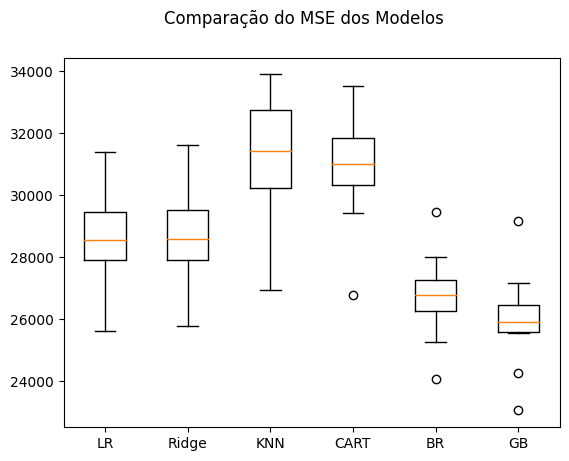

In [37]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(21)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge(alpha=500)))
models.append(('KNN', KNeighborsRegressor(n_neighbors=8)))
models.append(('CART', DecisionTreeRegressor(min_samples_leaf=10)))
models.append(('BR', BaggingRegressor(n_estimators=100, max_features=10)))
models.append(('GB', GradientBoostingRegressor()))



# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(abs(cv_results))
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Conclusões da etapa

Vemos por meio da métrica MSE (mean squared error) que os ensembles apresentam melhores resultados que os algaritmos de Machine Learning clássico usados isoladamente.

Embora a regressão linear tenha apresentado resultados melhores que algoritmos como KNN e Árvore de Regressão, é possível que com um melhor ajuste de hiperparâmetros essa condição se modifique.

Considerando que há diversas variáveis do tipo categóricas no dataset (modificadas para 1 ou 0), era também já esperado que algoritmos do tipo 'árvore' apresentassem melhor desempenho que algoritmos baseados em distância, o que se viu confirmado. Essa foi também a razão de não terem sido experimentados algoritmos como SVM, pois tomaria um tempo de processamento com piores resultados.

Entre os ensembles, vemos que o Gradient Boosting desempenhou melhor que o algoritmo de Bagging, entendendo que o aprendizado a partir dos erros promove um real incremento da capacidade de acerto do modelo.

### 2) Modelagem com dados transformados

#### Feature Selection

Analisando um pouco mais a fundo o dataset, podemos observar que algumas variáveis possuem maior influência sobre o preço das acomodações que outras. Ao identificarmos quais são elas pode contribuir de duas formas para o problema com o qual estamos lidando:
- *redução de variáveis* (feature selection): Ao reduzirmos o número de variáveis do dataset àquelas de maior influência sobre o preço, teremos a possibilidade de reduzir o ruído de alguns modelos tornando seu aprendizado tanto mais rápido quanto mais preciso.

- *informação de interesse:* Ao sabermos quais variáveis possuem maior influência sobre o preço da acomodação, pessoas interessadas em ter um imóvel no Airbnb no Rio de Janeiro terão uma informação com potencial para extrair maiores lucros.

##### **Método Univariado**

Uma das opções para identificar as variáveis de maior influência é o algoritmo SelectKBest. Ele utiliza o método estatístico da correlação de Pearson para a sugestão de uma seleção dos atributos. Com isso, a tendência será eliminar atributos que demonstrem menor correlação com a variável target.

In [43]:
# SelectKBest

# fixando seed para a célula
np.random.seed(seed)

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=r_regression, k=10)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)


# Exibe os atributos orginais
print("\nAtributos Originais:", dataset_X.columns)


# Exibe as pontuações de cada atributos e as 10 escolhidas
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_X.columns))


Atributos Originais: Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'entire_home', 'superhost', 'verified_host',
       'instant_booking', 'zona sul', 'beach', 'favela'],
      dtype='object')

Scores dos Atributos Originais: [ 0.442  0.422  0.479  0.355  0.297 -0.138  0.024  0.001  0.004  0.004
 -0.002  0.009 -0.08   0.314 -0.083  0.043 -0.08   0.033  0.206 -0.015]

Atributos Selecionados: ['accommodates' 'bathrooms' 'bedrooms' 'beds' 'cleaning_fee'
 'review_scores_rating' 'entire_home' 'verified_host' 'zona sul' 'beach']


Também podemos fazer uma visualização dessas correlações a partir de um mapa de calor, utilizando uma matriz de correlação. Assim, poderemos também avaliar sobre variáveis co-dependentes, o que pode ser também um importante critério para o feature selection.

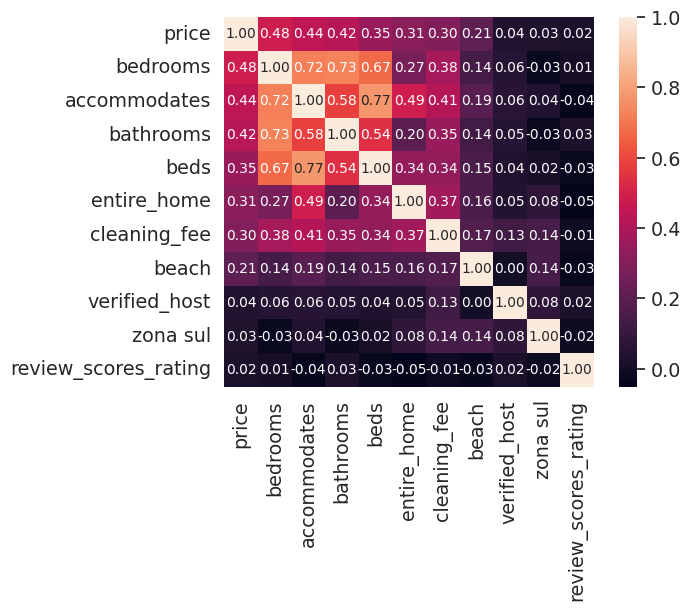

In [39]:
# Heatmap do dataset de treino

# fixando seed para a célula
np.random.seed(seed)

# convertendo dataset de treino em dataframe
train_dataset = pd.DataFrame(X_train)
train_dataset.columns = dataset_X.columns
train_dataset['price'] = y_train

# heatmap de correlação entre as variáveis
corrmatrix = train_dataset.corr(numeric_only=True)
k = 11 # quantidade variáveis no heatmap
columns = corrmatrix.nlargest(k, 'price').index # seleção das 10 mais correlacionadas ao preço
coeficient = np.corrcoef(train_dataset[columns].values.T)
sn.set(font_scale=1.25)
sn.heatmap(coeficient, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)

del corrmatrix

Nesse caso, vemos que algumas variáveis parecem ser co-dependentes, como por exemplo o número de camas e a quantidade de pessoas que o espaço acomoda, ou seja, condições diretamente relacionadas. Em casos como este, podemos escolher apenas uma das duas variáveis, reduzindo o ruído para alguns modelos.

##### **Método da importância de atributos**

Outra forma de identificar as variáveis de maior influência é a utilização de algoritmos ensembles tipo árvore de decisão, que atribuem pesos às variáveis no processamento. Dessa forma, cada atributo recebe uma pontuação conforme seu grau de importância para a predição da variável de interesse.

In [40]:
# Importância de Atributos com ExtraTrees

# fixando seed para a célula
np.random.seed(seed)

# Criação do modelo para seleção de atributos
modelo = ExtraTreesRegressor(n_estimators=100)
modelo.fit(X_train, y_train)

# Exibe os atributos orginais
ET_results = pd.DataFrame(columns=['features'])
ET_results['features'] = dataset_X.columns
ET_results['points'] = modelo.feature_importances_

ET_results.sort_values(by = 'points', ascending = False).head(10) # exibe as 10 variáveis de maior pontuação

,features,points
4,cleaning_fee,0.114687
0,accommodates,0.112514
2,bedrooms,0.107254
1,bathrooms,0.103249
5,number_of_reviews,0.093307
13,entire_home,0.068342
3,beds,0.066968
6,review_scores_rating,0.047223
12,review_scores_value,0.044779
8,review_scores_cleanliness,0.033348


Vemos que resultado apresenta poucas diferenças em relação ao método que utiliza a correlação, de forma que se reduzirmos o dataset às 10 variáveis de maior peso teremos um conjunto bem semelhante.
A principal diferença é que o Extra Trees foi mais sensível às variáveis relacionadas à plataforma do Airbnb, como a quantidade de avaliações e as notas de atribuidas por usuários. Por outro lado, deu menor peso às variáveis relacionadas à localização das acomodações.

##### **Treinamento com Feature Selection**

LR-orig: MSE 28536.78 (1552.05) - RMSE 168.93
Ridge-orig: MSE 28618.04 (1536.33) - RMSE 169.17
KNN-orig: MSE 31269.85 (1990.75) - RMSE 176.83
CART-orig: MSE 30840.28 (1777.13) - RMSE 175.61
BR-orig: MSE 27955.54 (1570.73) - RMSE 167.20
GB-orig: MSE 25951.26 (1541.53) - RMSE 161.09
LR-skb: MSE 28919.11 (1503.10) - RMSE 170.06
Ridge-skb: MSE 29013.17 (1493.66) - RMSE 170.33
KNN-skb: MSE 30470.95 (1379.03) - RMSE 174.56
CART-skb: MSE 29927.54 (1545.95) - RMSE 173.00
BR-skb: MSE 30170.91 (1275.71) - RMSE 173.70
GB-skb: MSE 26183.06 (1481.33) - RMSE 161.81
LR-ET: MSE 29599.90 (1597.70) - RMSE 172.05
Ridge-ET: MSE 29668.92 (1568.69) - RMSE 172.25
KNN-ET: MSE 30969.36 (1419.16) - RMSE 175.98
CART-ET: MSE 30150.27 (1272.61) - RMSE 173.64
BR-ET: MSE 31694.37 (1237.56) - RMSE 178.03
GB-ET: MSE 26905.35 (1430.61) - RMSE 164.03


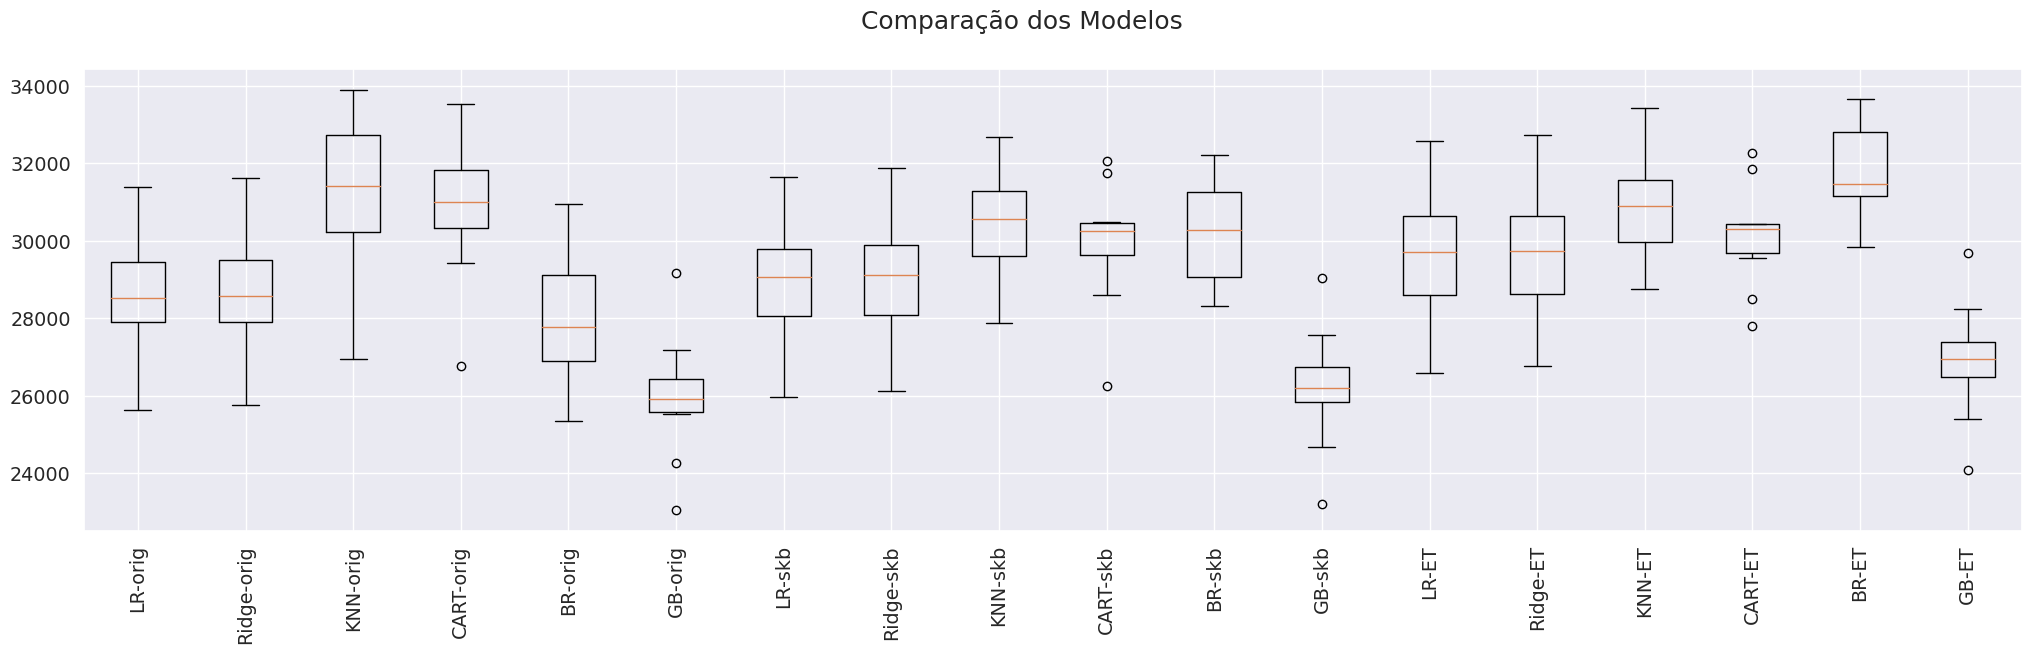

In [41]:
# Treinamento com Feature Selection

# definindo uma semente global para este bloco
np.random.seed(seed)

# Listas para armazenar os armazenar os pipelines e os resultados
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
lr = ('LR', LinearRegression())
ridge = ('Ridge', Ridge(alpha=500))
knn = ('KNN', KNeighborsRegressor(n_neighbors=8))
cart = ('CART', DecisionTreeRegressor(min_samples_leaf=10))
bagging = ('BR', BaggingRegressor(n_estimators=100))
g_boosting = ('GB', GradientBoostingRegressor())


# Transformações que serão utilizadas
select_kbest = ('skb', SelectKBest(k = 10))
extra_trees = ('feature_selection', SelectFromModel(ExtraTreesRegressor(n_estimators=100)))

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([lr])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('BR-orig', Pipeline([bagging])))
pipelines.append(('GB-orig', Pipeline([g_boosting])))


# Feature Selection SelectKBest
pipelines.append(('LR-skb', Pipeline([select_kbest, lr])))
pipelines.append(('Ridge-skb', Pipeline([select_kbest, ridge])))
pipelines.append(('KNN-skb', Pipeline([select_kbest, knn])))
pipelines.append(('CART-skb', Pipeline([select_kbest, cart])))
pipelines.append(('BR-skb', Pipeline([select_kbest, bagging])))
pipelines.append(('GB-skb', Pipeline([select_kbest, g_boosting])))

# Feature Selection ExtraTrees
pipelines.append(('LR-ET', Pipeline([extra_trees, lr])))
pipelines.append(('Ridge-ET', Pipeline([extra_trees, ridge])))
pipelines.append(('KNN-ET', Pipeline([extra_trees, knn])))
pipelines.append(('CART-ET', Pipeline([extra_trees, cart])))
pipelines.append(('BR-ET', Pipeline([extra_trees, bagging])))
pipelines.append(('GB-ET', Pipeline([extra_trees, g_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(abs(cv_results))
    names.append(name)
    msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#### Normalização e Padronização

Uma outra forma de buscar uma melhora do desempenho dos algoritmos é diminuir a discrepância de escala entre as variáveis, que pode afetar os pesos atribuídos no resultado da regressão. Com esse intuito, foram testados os métodos de padronização e normalização.

LR-orig: MSE 28536.78 (1552.05) - RMSE 168.93
Ridge-orig: MSE 28618.04 (1536.33) - RMSE 169.17
KNN-orig: MSE 31269.85 (1990.75) - RMSE 176.83
CART-orig: MSE 30840.28 (1777.13) - RMSE 175.61
BR-orig: MSE 26716.13 (1389.09) - RMSE 163.45
GB-orig: MSE 25951.26 (1541.53) - RMSE 161.09
LR-std: MSE 28536.78 (1552.05) - RMSE 168.93
Ridge-std: MSE 28545.38 (1538.99) - RMSE 168.95
KNN-std: MSE 29700.02 (1336.46) - RMSE 172.34
CART-std: MSE 30845.67 (1779.97) - RMSE 175.63
BR-std: MSE 26753.23 (1409.18) - RMSE 163.56
GB-std: MSE 25965.71 (1537.11) - RMSE 161.14
LR-norm: MSE 28536.78 (1552.05) - RMSE 168.93
Ridge-norm: MSE 32905.93 (1989.99) - RMSE 181.40
KNN-norm: MSE 30333.65 (1468.79) - RMSE 174.17
CART-norm: MSE 30831.09 (1771.38) - RMSE 175.59
BR-norm: MSE 26819.67 (1438.78) - RMSE 163.77
GB-norm: MSE 25953.90 (1542.35) - RMSE 161.10


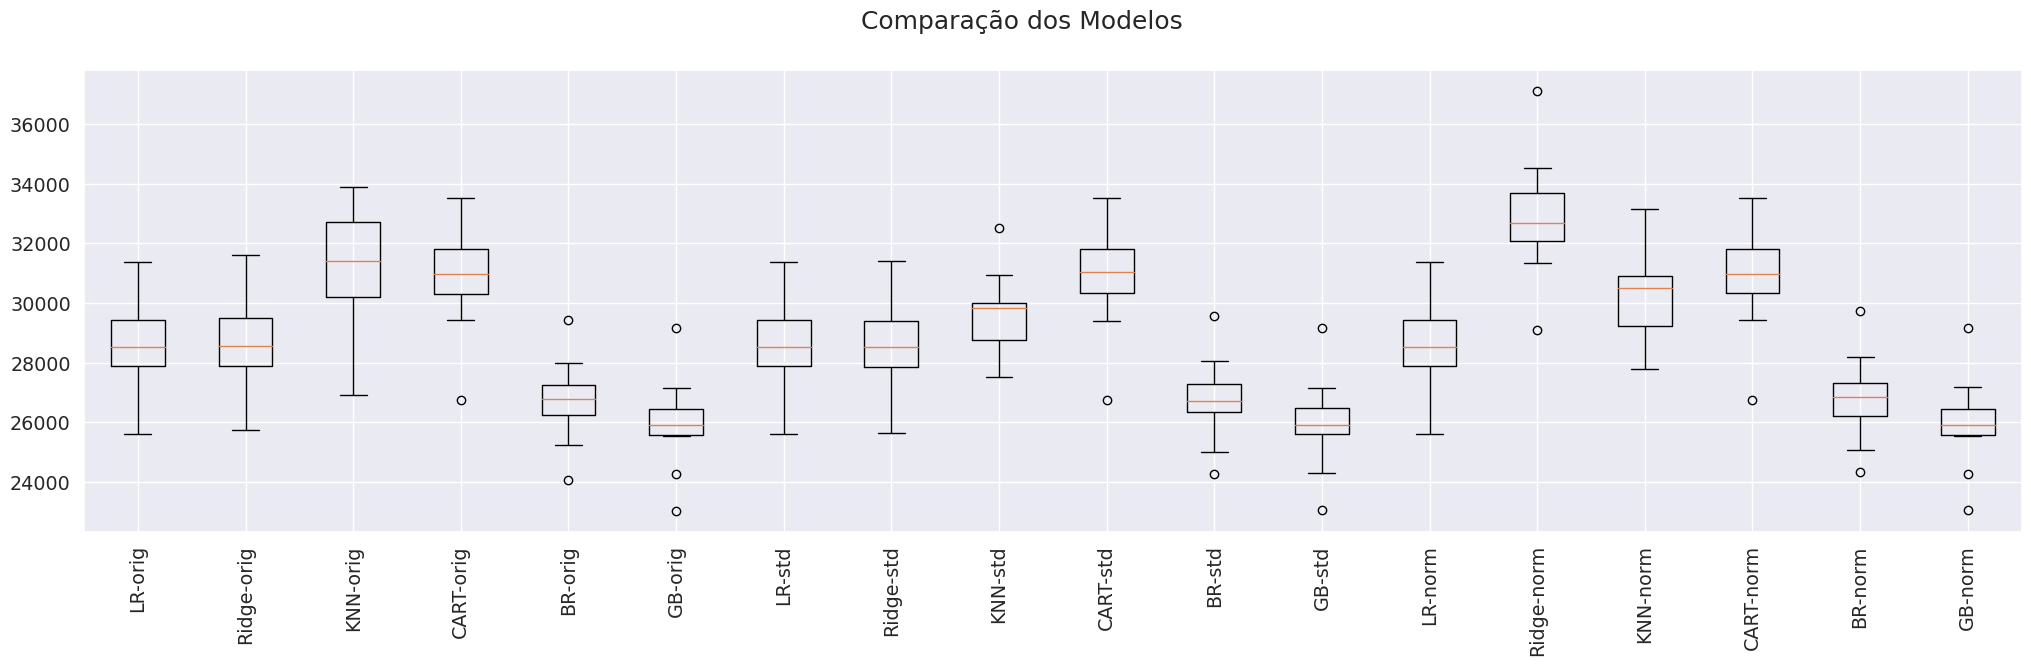

In [42]:

# definindo uma semente
np.random.seed(seed)

# Listas para armazenar os armazenar os pipelines e os resultados
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
lr = ('LR', LinearRegression())
ridge = ('Ridge', Ridge(alpha=500))
knn = ('KNN', KNeighborsRegressor(n_neighbors=8))
cart = ('CART', DecisionTreeRegressor(min_samples_leaf=10))
bagging = ('BR', BaggingRegressor(n_estimators=100, max_features=10))
g_boosting = ('GB', GradientBoostingRegressor())


# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([lr])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('BR-orig', Pipeline([bagging])))
pipelines.append(('GB-orig', Pipeline([g_boosting])))


# Dataset Padronizado
pipelines.append(('LR-std', Pipeline([standard_scaler, lr])))
pipelines.append(('Ridge-std', Pipeline([standard_scaler, ridge])))
pipelines.append(('KNN-std', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-std', Pipeline([standard_scaler, cart])))
pipelines.append(('BR-std', Pipeline([standard_scaler, bagging])))
pipelines.append(('GB-std', Pipeline([standard_scaler, g_boosting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('BR-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, g_boosting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(abs(cv_results))
    names.append(name)
    msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#### Conclusões da etapa

**Feature Selection**

A redução de variáveis para os algoritmos utilizados não apresentou grandes diferenças para a métrica MSE na maioria deles. Especialmente entre aqueles com estrutura baseada em árvore de decisão, a realização de uma seleção prévia de atributos provocou uma piora de desempenho em alguns deles, já anteriormente haviam mais elementos para as decisões em cada nó.


**Normalização e padronização**

Com os ajustes de normalização e padronização do dataset, percebemos que o modelo que sofre maior variação é o KNN, embora ainda assim não consiga superar os demais de forma significativa.
Por outro lado, nota-se que modelos como o de regressão linear com a regularização Ridge, chegam até a apresentar uma piora no caso da normalização, pois o tal método concorre com a regularização já aplicada.
Também fica claro na comparação que os modelos que utilizam algoritmos do tipo 'árvore' são pouco afetados por esse tipo de transformação dos dados, uma vez que já lidam bem com essas variações por princípio.

### 3) Modelo final

Uma vez que identificamos, por sucessivas experimentações, um melhor desempenho do ensemble 'Gradient Boosting' em comparação com outras opções de algoritmos, consideremos este como opção final para o problema proposto.

No entanto, ainda é possível melhorar seu desempenho otimizando os hiperparâmentros do modelo.

#### Otimização com GridSearch

Utilizaremos o algoritmo GridSearch para testar algumas variações dos hiperparâmetros do modelo Gradient Boosting, com a intenção de melhorar seu desempenho, ou seja, reduzir a média do erro quadrado (MSE).

In [44]:
# Tuning do Gradient Boosting

np.random.seed(seed) # definindo uma semente global para este bloco


# Definindo os componentes do pipeline
g_boosting = GradientBoostingRegressor()


param = {'learning_rate': [0.1,0.05,0.03],
         'n_estimators' : [100,150,200],
         'max_depth'    : [4,6,10]
}

# Prepara e executa o GridSearchCV
grid_GB = GridSearchCV(estimator=g_boosting, param_grid=param, scoring=scoring, cv=kfold)
grid_GB.fit(X_train, y_train)

# imprime a melhor configuração
print('Melhor: %f usando %s' % (grid_GB.best_score_, grid_GB.best_params_))

Melhor: -25861.993055 usando {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}


#### Treinamento do modelo final

In [45]:

# Preparação do modelo

l_rate = 0.05
n_estim = 100
max_depth = 6

model = GradientBoostingRegressor(learning_rate=l_rate, n_estimators=n_estim,)

model.fit(X_train, y_train)

# salva o modelo
joblib.dump(model, 'airbnb_predictions_GB.joblib')

['airbnb_predictions_GB.joblib']

## Implementação no dataset teste

In [49]:
# caso queira fazer o load
# do modelo treinado em outro momento

file_id = '1TIzX18dZxJ_ZqKLVNmvj-naLwbBIBVha'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'airbnb_predictions_GB.joblib'
gdown.download(url, output)

model = joblib.load(output)

Downloading...
From: https://drive.google.com/uc?id=1TIzX18dZxJ_ZqKLVNmvj-naLwbBIBVha
To: /content/airbnb_predictions_GB.joblib
100%|██████████| 177k/177k [00:00<00:00, 41.7MB/s]


In [50]:
# Predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 27034.13
RMSE 164.42


## Avaliação dos Resultados

### Avaliação das métricas:


**Métricas Escolhidas:**

Considerando que se trata de um problema de regressão, optamos então por utilizar métricas relacionadas à medidas de erro do modelo, como MSE e RMSE. Para a comparação entre cada modelo, usamos a MSE, especialmente na observação dos gráficos. No entanto, para uma melhor leitura do resultado final, observamos a RMSE, por nos dar um resultado na mesma escala dos valores de saída.

**Avaliação:**

O modelo final treinado não apresentou overfitting no dataset de treino, tendo apresentado resultados semelhantes no dataset de teste.

No entanto, o valor que se observa para a RMSE mostra um erro médio bastante alto considerando o conjunto. Isto porque, quando observamos a distribuição dos preços das acomodações no dataset de treino, por exemplo, constatamos que o valor médio das diárias está entre 200 e 400 dólares, ao passo que a RMSE do modelo fica próxima de 200.

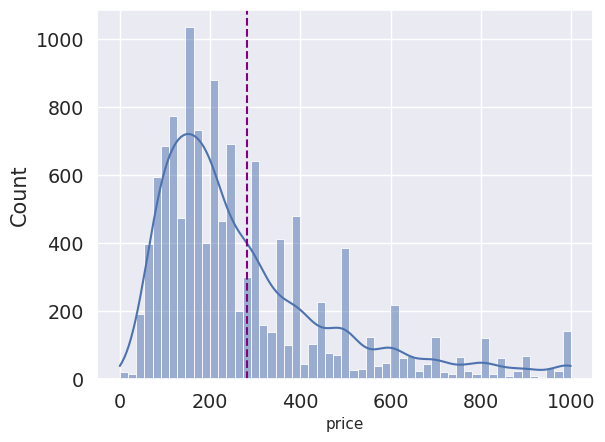

In [53]:
# histograma dados de treino

np.random.seed(seed)# fixando seed para a célula

sn.histplot(y_train, kde=True)
plt.xlabel('price', size=11)
plt.axvline(x=y_train.mean(), color='purple', ls='--',)


Por outro lado, percebemos que a distribuição não segue propiamente uma  normal. Isso pode fazer com que o algoritmo tenha dificuldade no aprendizado em relação às faixas de preço de menor ocorrência. Com isso, a média do erro tende também a ser maior.

É possível ainda que as variáveis disponíveis não sejam suficientes para uma predição mais precisa do modelo, tratando-se de um problema mais complexo do que a abordagem empregada.

### Possibilidades para melhora do desempenho:

Para a uma melhora do desempenho do modelo teríamos alguns possíveis caminhos para adotar:

- ***maior input de dados:*** se aumentarmos a quantidade de dados introduzida no modelo, temos um alto potencial para que seu aprendizado seja mais preciso. Ao final do pre-processamento do dataset, resultaram apenas 15.193 entradas, o que se mostrou pouco para um problema dessa complexidade.

- ***variáveis:*** uma vez que o modelo final escolhido lida de forma consistente com um alto conjunto de variáveis, poderia ser interessante agregar mais informações sobre as acomodações - especialmente em relação à sua localização/bairro - para uma melhor leitura do modelo.

- ***fatores não considerados:*** algumas questões que implicam também na variação dos preços do Airbnb não foram consideradas para esta proposta, como por exemplo a sazonalidade do aluguel. Nesse ponto, a coleta dos dados realizou apenas uma fotografia de um momento (por questões de simplificação prática para este exercício), enquanto há uma realidade dinâmica em relação a esses preços.